In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = "CollegeMsg.txt"
G = nx.Graph()

# Count temporal edges
temporal_edges_count = 0

with open(file_path, 'r') as file:
    for line in file:
        u, v, t = map(int, line.strip().split())
        G.add_edge(u, v)
        temporal_edges_count += 1

# Dataset statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Dataset Statistics:")
print(f"Nodes: {num_nodes}")
print(f"Temporal Edges: {temporal_edges_count}")
print(f"Edges in static graph: {num_edges}")
# print(f"Time span: 193 days")

Dataset Statistics:
Nodes: 1899
Temporal Edges: 59835
Edges in static graph: 13838


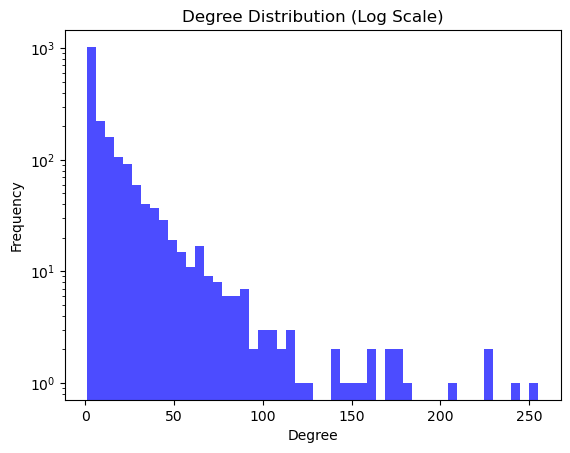


Degree Statistics:
Max Degree: 255
Min Degree: 1
Average Degree: 14.57
Standard Deviation of Degree Distribution: 24.46


In [47]:
# Calculate degree distribution
degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(degrees)
min_degree = min(degrees)
avg_degree = np.mean(degrees)
std_degree = np.std(degrees)

# Plot degree distribution in log scale
plt.hist(degrees, bins=50, log=True, color='blue', alpha=0.7)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print degree statistics
print("\nDegree Statistics:")
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Standard Deviation of Degree Distribution: {std_degree:.2f}")

In [49]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0, max_iter=1000)
pagerank_centrality = nx.pagerank(G, alpha=0.85)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Clustering coefficients
local_clustering_coefficients = nx.clustering(G)
global_clustering_coefficient = nx.average_clustering(G)
avg_local_clustering_coefficient = np.mean(list(local_clustering_coefficients.values()))

# Function to get top 10 nodes for a centrality measure
def get_top_10(centrality_dict, measure_name):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    top_10 = sorted_centrality[:10]
    return pd.DataFrame(top_10, columns=["Node", measure_name])

In [51]:
# Get top 10 nodes for each centrality measure
top_10_degree = get_top_10(degree_centrality, "Degree Centrality")
top_10_eigenvector = get_top_10(eigenvector_centrality, "Eigenvector Centrality")
top_10_katz = get_top_10(katz_centrality, "Katz Centrality")
top_10_pagerank = get_top_10(pagerank_centrality, "PageRank Centrality")
top_10_betweenness = get_top_10(betweenness_centrality, "Betweenness Centrality")
top_10_closeness = get_top_10(closeness_centrality, "Closeness Centrality")
top_10_local_clustering = get_top_10(local_clustering_coefficients, "Local Clustering Coefficient")

In [53]:
# Display top 10 tables
print("Top 10 Nodes for Degree Centrality:")
print(top_10_degree)

print("\nTop 10 Nodes for Eigenvector Centrality:")
print(top_10_eigenvector)

print("\nTop 10 Nodes for Katz Centrality:")
print(top_10_katz)

print("\nTop 10 Nodes for PageRank Centrality:")
print(top_10_pagerank)

print("\nTop 10 Nodes for Betweenness Centrality:")
print(top_10_betweenness)

print("\nTop 10 Nodes for Closeness Centrality:")
print(top_10_closeness)

print("\nTop 10 Nodes for Local Clustering Coefficient:")
print(top_10_local_clustering)

Top 10 Nodes for Degree Centrality:
   Node  Degree Centrality
0   103           0.134352
1     9           0.126976
2   105           0.119600
3   400           0.119600
4    32           0.109062
5    41           0.096417
6     3           0.093783
7    42           0.093256
8   249           0.090622
9   638           0.089041

Top 10 Nodes for Eigenvector Centrality:
   Node  Eigenvector Centrality
0   103                0.156268
1   105                0.156126
2    32                0.150791
3     9                0.142565
4   249                0.122914
5   638                0.122764
6   400                0.121178
7     3                0.121055
8   372                0.116349
9   194                0.116088

Top 10 Nodes for Katz Centrality:
   Node  Katz Centrality
0   103         0.086568
1   105         0.082902
2     9         0.082192
3    32         0.078711
4   400         0.075915
5     3         0.068822
6   249         0.067828
7    41         0.067799
8   638      

In [55]:
# Check if the graph is directed
if nx.is_directed(G):
    print("The graph is directed.")
    reciprocity = nx.reciprocity(G)
else:
    print("The graph is undirected.")
    reciprocity = 1.0  # Undirected graphs have reciprocity = 1.0

# Transitivity
transitivity = nx.transitivity(G)

# Print results
print(f"Reciprocity: {reciprocity}")
print(f"Transitivity: {transitivity}")

# Print global and average local clustering coefficients
print(f"\nGlobal Clustering Coefficient: {global_clustering_coefficient}")
print(f"Average Local Clustering Coefficient: {avg_local_clustering_coefficient}")

The graph is undirected.
Reciprocity: 1.0
Transitivity: 0.056830298909088986

Global Clustering Coefficient: 0.10939892385364362
Average Local Clustering Coefficient: 0.10939892385364362


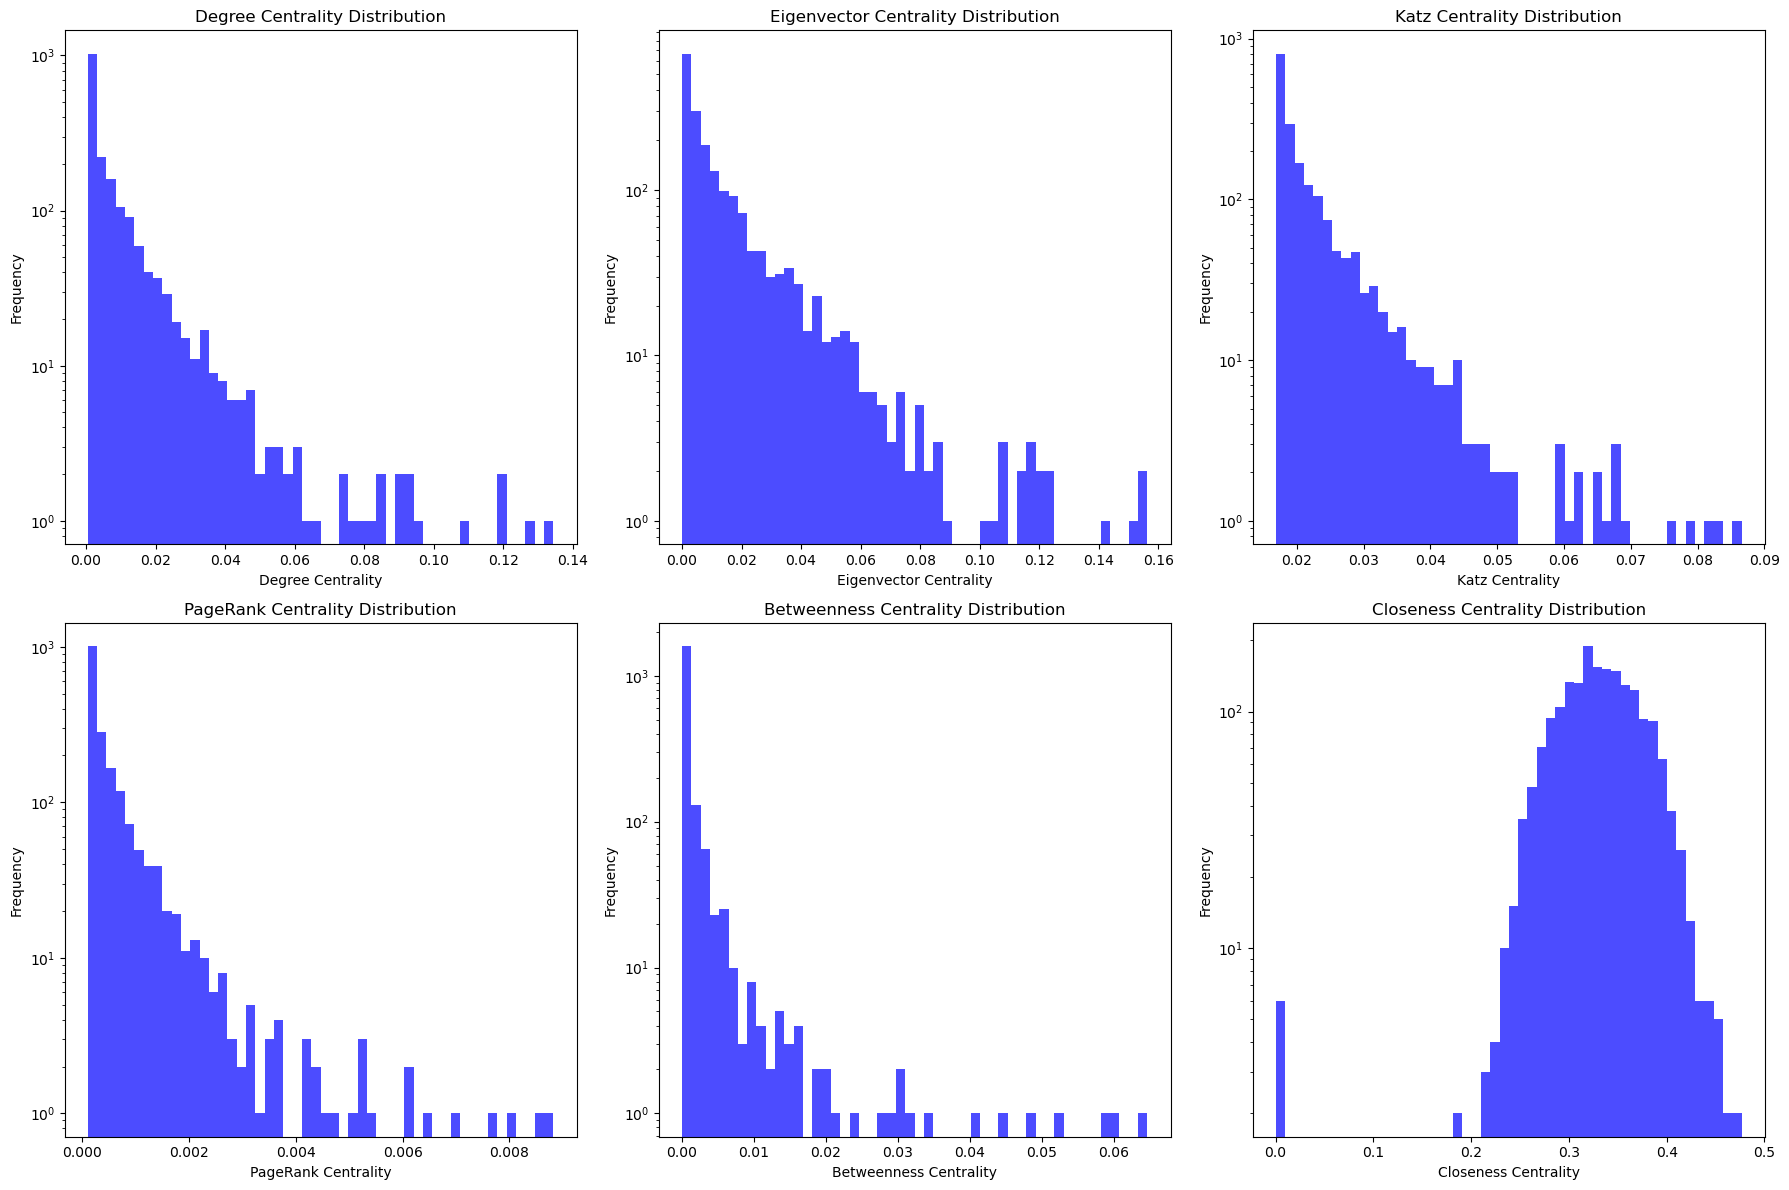

In [57]:
# Visualize centrality distributions
plt.figure(figsize=(18, 12))

# Degree Centrality
plt.subplot(2, 3, 1)
plt.hist(list(degree_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

# Eigenvector Centrality
plt.subplot(2, 3, 2)
plt.hist(list(eigenvector_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

# Katz Centrality
plt.subplot(2, 3, 3)
plt.hist(list(katz_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Katz Centrality Distribution")
plt.xlabel("Katz Centrality")
plt.ylabel("Frequency")

# PageRank Centrality
plt.subplot(2, 3, 4)
plt.hist(list(pagerank_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("PageRank Centrality Distribution")
plt.xlabel("PageRank Centrality")
plt.ylabel("Frequency")

# Betweenness Centrality
plt.subplot(2, 3, 5)
plt.hist(list(betweenness_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

# Closeness Centrality
plt.subplot(2, 3, 6)
plt.hist(list(closeness_centrality.values()), bins=50, log=True, color='blue', alpha=0.7)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

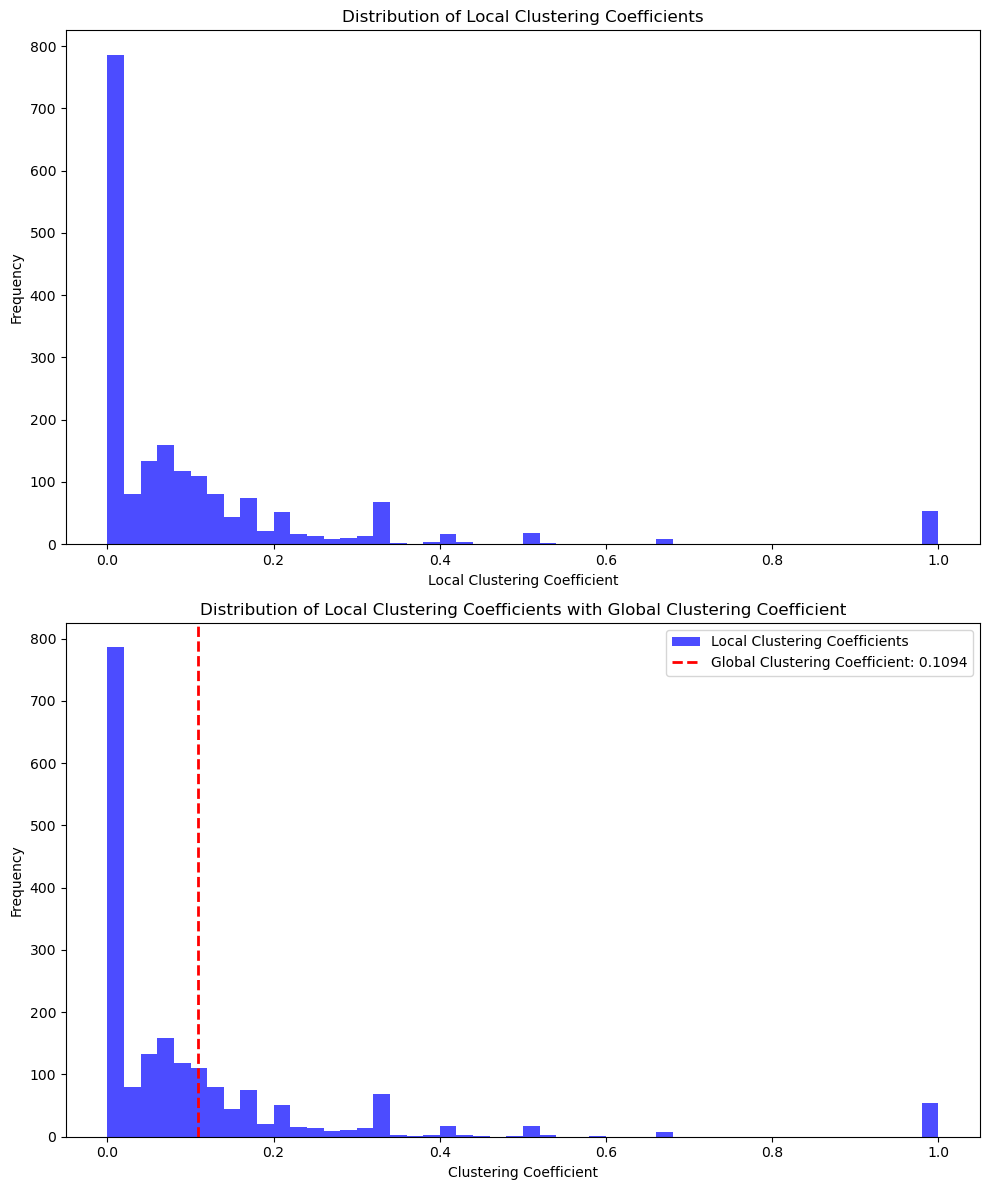

In [59]:
# Create a figure with 2 rows and 1 column
plt.figure(figsize=(10, 12))

# First subplot: Distribution of local clustering coefficients
plt.subplot(2, 1, 1)
plt.hist(list(local_clustering_coefficients.values()), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Local Clustering Coefficients")
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Frequency")

# Second subplot: Distribution of local clustering coefficients with global clustering coefficient
plt.subplot(2, 1, 2)
plt.hist(list(local_clustering_coefficients.values()), bins=50, color='blue', alpha=0.7, label="Local Clustering Coefficients")
plt.axvline(global_clustering_coefficient, color='red', linestyle='dashed', linewidth=2, label=f"Global Clustering Coefficient: {global_clustering_coefficient:.4f}")
plt.title("Distribution of Local Clustering Coefficients with Global Clustering Coefficient")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()